In [2]:
import numpy as np
from glob import glob


def extract_info(filename):
    npts = np.fromfile(filename,dtype=np.uint32,count=1)[0]
    dt = np.dtype([
        ('npts', np.uint32),
        ('timestamps', np.uint64),
        ('wvfs', (np.uint16,npts))])
    data = np.fromfile(filename, dtype=dt)

    return [data['timestamps'],data['wvfs']]

channels = [1225,
            1240,
            1242,
            1245,
            1247,
            1300,
            1302,
            1305,
            1307]
            
run = 26262
files = sorted(glob(f"./run0{run}/*.dat"))

dataset = {}
for ch in channels:
    for f in files:
        if str(ch) in f:
            dataset[ch] = extract_info(f)
            


In [3]:
for d in dataset.items():
    print(f'{d[0]}: {len(d[1])}')
    

1247: 2


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 79719) + inhomogeneous part.

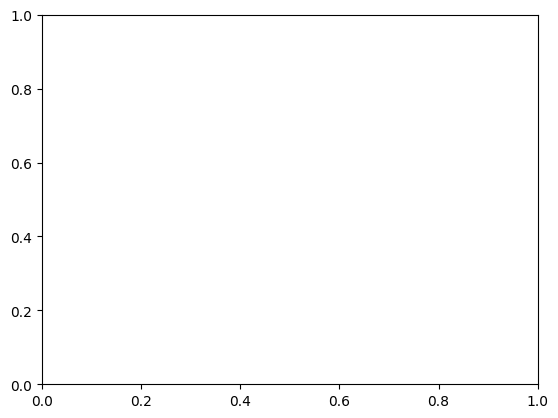

In [20]:
import matplotlib.pyplot as plt
evts = [ i for i, _ in enumerate(dataset[1247]) ]
plt.plot(evts, dataset[1247])
np.all(dataset[1245][:2440][1:] >= dataset[1247][:2440][:-1])

print(np.where(dataset[1247] == 107235934227445824))


In [12]:
test = dataset[1247][0][0]
test

107240486312730944

In [13]:
# print(test.tobytes().hex())
print(hex(test))
print(test.tobytes())
print(int(test).to_bytes(8,"little").hex())
print(int(test).to_bytes(8,"little"))
print(hex(1024))
print((1024).to_bytes(4,'little').hex())
print((1024).to_bytes(4,'little'))
f = open('test.dat', 'wb')
f.write((int(test).to_bytes(8,'little')))
f.write(test.tobytes())
f.close()
test

0x17cfea77435e140
b'@\xe15t\xa7\xfe|\x01'
40e13574a7fe7c01
b'@\xe15t\xa7\xfe|\x01'
0x400
00040000
b'\x00\x04\x00\x00'


107240486312730944

In [25]:
id=1247
times = dataset[id][0]
wvfs  = dataset[id][1]

tmp, idxu, uinv, uc = np.unique(times, return_counts=True, return_index=True, return_inverse=True)
tmp
print(f'Original size: { len(times) }')
idxu = idxu[uc>1]
print(f'Duplicated: {len(tmp)}')
mask = np.full(len(times), True, dtype=bool)
mask[idxu] = False

indxs = [ i for i, m in enumerate(mask) if m == True]


print(len(indxs))
for ids in indxs:
    # print(ids, np.where(times==times[ids]))
    repeated = np.where(times==times[ids])[0]
    if (np.all(wvfs[repeated]!=wvfs[repeated][0])):
        plt.figure()
        for r in repeated:
            print(r)
            plt.plot(wvfs[r])
        break
        
    # print(wvfs[repeated])


# len(times)

# # plt.plot(wvfs[38])
# # plt.plot(wvfs[38])
# # plt.plot(wvfs[39])

        

Original size: 79719
Duplicated: 10382
70987


[ 3  4  5  6  7  8  9 10 11 12]
[8190 8190 8189 ... 8185 8186 8189]
[8190 8190 8189 ... 8185 8186 8189]
[8190 8190 8189 ... 8185 8186 8189]
[8190 8190 8189 ... 8185 8186 8189]
[8190 8190 8189 ... 8185 8186 8189]
[8190 8190 8189 ... 8185 8186 8189]
[8190 8190 8189 ... 8185 8186 8189]
[8190 8190 8189 ... 8185 8186 8189]
[8190 8190 8189 ... 8185 8186 8189]
[8190 8190 8189 ... 8185 8186 8189]


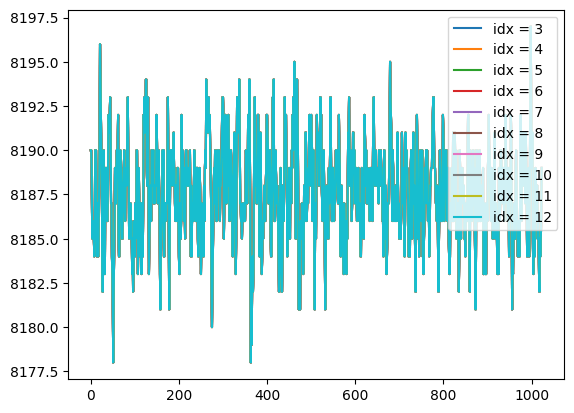

In [50]:
repeated = np.where(times == 107240486318877504)[0]
print((repeated))
for wvf, ir in zip(wvfs[repeated], repeated):
    plt.plot(wvf, label=f'idx = {ir}')
    print(wvf)
plt.legend()
# for ir in repeated:
#     plt.plot(wvfs[ir])
